# Project 2  Part 3: Advanced Text Processing - LDA and BERTopic Topic Modeling (20 pts)


**Resources:**
- LDA:
    - https://medium.com/sayahfares19/text-analysis-topic-modelling-with-spacy-gensim-4cd92ef06e06 
    - https://www.kaggle.com/code/faressayah/text-analysis-topic-modeling-with-spacy-gensim#%F0%9F%93%9A-Topic-Modeling (code for previous post)
    - https://towardsdatascience.com/topic-modelling-in-python-with-spacy-and-gensim-dc8f7748bdbf/ 
- BERTopic:
    - https://maartengr.github.io/BERTopic/getting_started/visualization/visualize_documents.html#visualize-documents-with-plotly 
    - https://maartengr.github.io/BERTopic/getting_started/visualization/visualize_topics.html 


In [1]:
####################
## MOVE THIS BLOCK TO part03.py
####################

####################
## CALL THIS BLOCK TO part03.py
####################

# from tqdm.auto import tqdm
from spacy import displacy
from bertopic import BERTopic
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis
import pyLDAvis.gensim_models

In [3]:
####################
## CALL THIS BLOCK FROM part00_utils_visuals.py
####################

# read in SOTU.csv using pandas, name the variable `sou` for simplicity
# the below cell is what the output should look like

from src import part00_utils_visuals as part00
# import src.part00_utils_visuals as part00

from src import part01

part00.plot_style(style=part00.PLOT_STYLE_SEABORN)

sou = part00.pd.read_csv(part00.DIR_DATA_00_RAW / part00.CSV_SOTU)

In [4]:
sou

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169
...,...,...,...,...
241,George Washington,1791.0,\nFellow-Citizens of the Senate and House of R...,2264
242,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
243,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
244,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069


### LDA

- Train an LDA model with 18 topics
- Output the top 10 words for each topic. 
- Output the topic distribution for the first speech
- Make a visualization

You may use the next two cells to process the data.

In [5]:
import spacy
from tqdm import tqdm
from collections import Counter

spacy.cli.download("en_core_web_sm")

nlp = spacy.load("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 76.9 MB/s  0:00:00m0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [6]:
####################
## MOVE THIS BLOCK TO part03.py
####################

####################
## CALL THIS BLOCK TO part03.py
####################

def preprocess_text(text): 
    doc = nlp(text) 
    return [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space and len(token.lemma_) > 3]

In [7]:
# Process all texts - note this takes ~ 5 minutes to run
# processed_docs = sou['Text'].apply(preprocess_text)

from tqdm.auto import tqdm
tqdm.pandas()  # registers .progress_apply()

step00_processed_docs = sou['Text'].progress_apply(preprocess_text)


  0%|          | 0/246 [00:00<?, ?it/s]

Example Progress Bar: 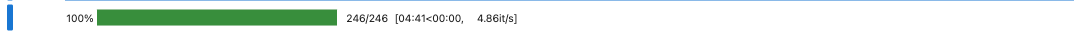)

In [8]:
type(step00_processed_docs)

pandas.core.series.Series

In [10]:
part01.save_the_processed_data_to_csv(data=step00_processed_docs, filepath=part00.DIR_DATA_03_LDA_BERT / "step00_processed_docs.csv")

To train an LDA model, use the LdaModel function that we imported a couple of cells back. The last resource linked under the LDA section is especially useful for walking through the steps we have below. *Note: one of the arguments to the LdaModel function is `random_state` which specifies the random seed for reproducibility. Please set yours to 42. Further, the last resource provided uses `LdaMulticore` which is essentially a parallelizable version of our function `LdaModel`. Use `LdaModel` instead, but the usage will be similar, except you can ignore the `iterations` and `workers` arguments..*.

In [ ]:
# processed_docs = read_csv(...)

In [ ]:
# Build dictionary from processed_docs, which is a list of tokens extracted from our speeches


In [ ]:
# train LDA model with 18 topics

In [ ]:
# print the top 10 words for each topic

In [ ]:
# print the topic distribution for the first speech

In [ ]:
# make a visualization using pyLDAvis
pyLDAvis.enable_notebook()
...

### BERTopic

- Train a BERTopic model with a `min_topic_size` of 3 *Hint: use `BERTopic` to instantiate the model and specify `min_topic_size` in here. Actually fit the model using `fit_transform`, which `docs` passed into this.*
- Output the top 10 words for each topic. 
- Output the topic distribution for the first speech
- Make a visualization of the topics (see topic_model.visualize_topics())

In [ ]:
docs = sou['Text'].to_list()

In [ ]:
# train the model - this takes about 30 seconds

# remove stop words from the topics (Hint: use CountVectorizer and then .update_topics on topic_model)

In [ ]:
# output the top 10 words for each topic - hint see get_topic_info

In [ ]:
# output the topic distribution for the first speech
# hint: check out approximate_distribution() and visualize_distribution()

In [ ]:
# run this cell to visualize the topics
topic_model.visualize_topics()